In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_data = np.random.rand(100)
y_data = 0.5*x_data + 0.1

# 构建一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b

# 二次代价函数
loss = tf.reduce_mean(tf.square(y_data-y))

# 梯度下降法优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)

# 最小化代价函数
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(301):
        sess.run(train)
        if i%20 == 0:
            print(i, "k=",sess.run(k),",b=",sess.run(b))

0 k= 0.0762613 ,b= 0.13094
20 k= 0.296557 ,b= 0.1993
40 k= 0.383216 ,b= 0.157002
60 k= 0.432962 ,b= 0.132721
80 k= 0.461518 ,b= 0.118783
100 k= 0.47791 ,b= 0.110782
120 k= 0.487319 ,b= 0.106189
140 k= 0.492721 ,b= 0.103553
160 k= 0.495821 ,b= 0.10204
180 k= 0.497601 ,b= 0.101171
200 k= 0.498623 ,b= 0.100672
220 k= 0.49921 ,b= 0.100386
240 k= 0.499546 ,b= 0.100221
260 k= 0.49974 ,b= 0.100127
280 k= 0.49985 ,b= 0.100073
300 k= 0.499914 ,b= 0.100042


In [5]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
x_data.shape

(200, 1)

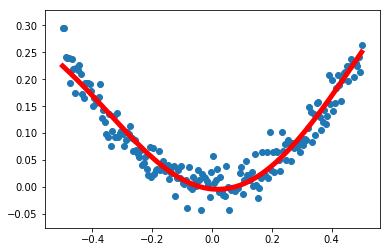

In [8]:
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
Weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))

Wx_plus_b_L1 = tf.matmul(x,Weight_L1)+biases_L1

# 定义激活函数，双曲正切函数
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义输出层
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros(1,1))
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2)+biases_L2

# 定义激活函数
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y_data-prediction))
# 优化器(梯度下降法)训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    #获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()